# Must Run

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
import scipy as sci
import scipy.signal as sig
import scipy.spatial as spa

#pip.main(['install'] + ['pyarrow'])
#import pyarrow.parquet as pq


#yearly = '/Users/athenaye/Desktop/by_year/2001.csv.gz'
ex = './Historical Data/%s.csv'
path = ex % 'LCM'
!wc -1 $psth

wc: illegal option -- 1
usage: wc [-clmw] [file ...]


## Background

In [ ]:
twenty_sixteen_sample = pd.read_csv("/Users/athenaye/Desktop/by_year/2016.csv", header = None, names = ['station', 'date', 'data', 'value', 'mflag', 'qflag', 'sflag', 'time'], usecols=[0,1,2,3])
twenty_seventeen_sample = pd.read_csv("/Users/athenaye/Desktop/by_year/2017.csv", header = None, names = ['station', 'date', 'data', 'value', 'mflag', 'qflag', 'sflag', 'time'], usecols=[0,1,2,3])
twenty_eighteen_sample = pd.read_csv("/Users/athenaye/Desktop/by_year/2018.csv", header = None, names = ['station', 'date', 'data', 'value', 'mflag', 'qflag', 'sflag', 'time'], usecols=[0,1,2,3])
twenty_nineteen_sample = pd.read_csv("/Users/athenaye/Desktop/by_year/2019.csv", header = None, names = ['station', 'date', 'data', 'value', 'mflag', 'qflag', 'sflag', 'time'], usecols=[0,1,2,3])
twenty_twenty_sample = pd.read_csv("/Users/athenaye/Desktop/by_year/2020.csv", header = None, names = ['station', 'date', 'data', 'value', 'mflag', 'qflag', 'sflag', 'time'], usecols=[0,1,2,3])

In [ ]:
twenty_sixteen_sample['date'] = pd.to_datetime(twenty_sixteen_sample['date'], format='%Y%m%d')
twenty_seventeen_sample['date'] = pd.to_datetime(twenty_seventeen_sample['date'], format='%Y%m%d')
twenty_eighteen_sample['date'] = pd.to_datetime(twenty_eighteen_sample['date'], format='%Y%m%d')
twenty_nineteen_sample['date'] = pd.to_datetime(twenty_nineteen_sample['date'], format='%Y%m%d')
twenty_twenty_sample['date'] = pd.to_datetime(twenty_twenty_sample['date'], format='%Y%m%d')

In [ ]:
twenty_sixteen = twenty_sixteen_sample.pivot(index = ["date", "station"], columns = "data", values = "value")
twenty_seventeen = twenty_seventeen_sample.pivot(index = ["date", "station"], columns = "data", values = "value")
twenty_eighteen = twenty_eighteen_sample.pivot(index = ["date", "station"], columns = "data", values = "value")
twenty_nineteen = twenty_nineteen_sample.pivot(index = ["date", "station"], columns = "data", values = "value")
twenty_twenty = twenty_twenty_sample.pivot(index = ["date", "station"], columns = "data", values = "value")

In [ ]:
twenty_sixteen.to_parquet("/Users/athenaye/Desktop/by_year/2016.parquet")

In [ ]:
twenty_seventeen.to_parquet("/Users/athenaye/Desktop/by_year/2017.parquet")
twenty_eighteen.to_parquet("/Users/athenaye/Desktop/by_year/2018.parquet")
twenty_nineteen.to_parquet("/Users/athenaye/Desktop/by_year/2019.parquet")
twenty_twenty.to_parquet("/Users/athenaye/Desktop/by_year/2020.parquet")

## For loop to save as a parquet

In [47]:
#Globbing
for py in glob.glob("/Users/athenaye/Desktop/by_year/*.csv"):
    csv = pd.read_csv(py, header = None, names = ['station', 'date', 'data', 'value', 'mflag', 'qflag', 'sflag', 'time'], usecols=[0,1,2,3])
    csv['date'] = pd.to_datetime(csv['date'], format='%Y%m%d')
    pivot = csv.pivot(index = ["date", "station"], columns = "data", values = "value")
    pivot.to_parquet(py+".parquet")
    #pd.read_csv("/Users/athenaye/Desktop/by_year/2016.csv", header = None, names = ['station', 'date', 'data', 'value', 'mflag', 'qflag', 'sflag', 'time'], usecols=[0,1,2,3])

## For loop to filter columns

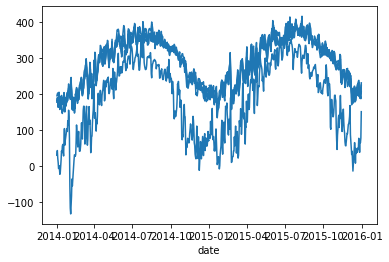

In [8]:
stationlist = ['AE000041196', 'AEM00041194', 'AEM00041217', 'AEM00041218', 'AFM00040938']
ultimatetavg = []
for f in glob.glob("/Users/athenaye/Desktop/by_year_parquet_trial/*.parquet"):
    for s in range(len(stationlist)):
        currentparq = pd.read_parquet(f)
        currentparq = currentparq['TAVG']
        stationtavg = currentparq.xs((stationlist[s]), level = "station")
        ultimatetavg.append(stationtavg)
        sns.lineplot(data = ultimatetavg, legend = False)


In [3]:
ugh = pd.DataFrame(np.zeros((70,5)))
x=0
for f in glob.glob("/Users/athenaye/Desktop/by_year_parquet_trial/*.parquet"):
    read = pd.read_parquet(f)
    if 'TAVG' in read.columns:
        print('yas')
    else:
        print(f)

yas
yas
yas
yas
yas
yas
yas
yas
yas
yas
yas
yas
yas
yas
yas
yas
yas
yas
yas
yas
yas


In [271]:
ugh

,0
0,AWDR
1,AWND
2,DAPR
3,DASF
4,DATN
...,...
64,WT08
65,WT09
66,WT10
67,WT11


# Code

In [3]:
years = []
stationlist = ['AE000041196', 'AEM00041194', 'AEM00041217', 'AEM00041218', 'AG000060390']
year = 0
ultimate = pd.DataFrame()
for f in glob.glob("/Users/athenaye/Desktop/by_year_parquet_trial/*.parquet"):    
    read = pd.read_parquet(f)
    f = pd.DataFrame()
    parameter = 'TAVG'
    if parameter in read.columns:
        years.append(f)
    else:
        print(str(parameter)+ ' was not found in ' + f)
        break
    read = read[parameter]
    for s in range(len(stationlist)):
        stationtavg = read.xs((stationlist[s]), level = "station")
        #print(stationtavg)
        f['station '+str(stationlist[s])] = stationtavg
    ultimate = pd.concat([ultimate, f])
    print("Done with 1 year")
    year += 1
avgoverall = ultimate.sort_values(by='date')

Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year


In [141]:
avgoverall

,station AE000041196,station AEM00041194,station AEM00041217,station AEM00041218,station AFM00040938
date,,,,,
2014-01-01,182.0,196.0,184.0,178.0,31.0
2014-01-02,191.0,201.0,188.0,184.0,44.0
2014-01-03,187.0,204.0,188.0,178.0,23.0
2014-01-04,179.0,196.0,186.0,164.0,11.0
2014-01-05,185.0,203.0,183.0,186.0,-6.0
...,...,...,...,...,...
2018-12-27,187.0,217.0,203.0,197.0,62.0
2018-12-28,187.0,216.0,202.0,196.0,92.0
2018-12-29,195.0,219.0,209.0,204.0,104.0


In [4]:
avgoverall.mean(axis=(1))

date
1998-01-01    185.2
1998-01-02    203.4
1998-01-03    185.8
1998-01-04    201.8
1998-01-05    204.2
              ...  
2018-12-27    181.4
2018-12-28    186.8
2018-12-29    187.6
2018-12-30    188.6
2018-12-31    194.4
Length: 7665, dtype: float64

In [63]:
meantavg = avgoverall.mean(axis=(1))

stationtavg = meantavg.interpolate('time',limit_direction='both')
stationtavg = stationtavg.to_numpy()
stationtavg

array([185.2, 203.4, 185.8, ..., 187.6, 188.6, 194.4])

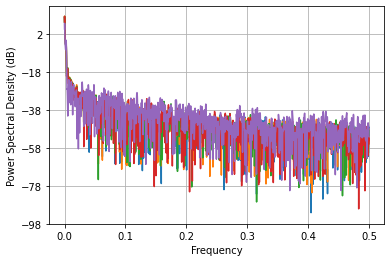

In [5]:
for x in range(len(avgoverall.columns)):
    nonan = avgoverall[avgoverall.columns[x]]
    nonan = nonan.interpolate('linear')
    a,b = plt.psd(nonan, Fs = 1, scale_by_freq = False, NFFT = 2**14 )
    if x == 0:
        acumulative = a
        bcumulative = b
    else:
        acumulative = np.vstack([acumulative, a])
        bcumulative = np.vstack([bcumulative, b])
amean = acumulative.mean(axis=(0))
bmean = bcumulative.mean(axis=(0))

Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year


<AxesSubplot:xlabel='date'>

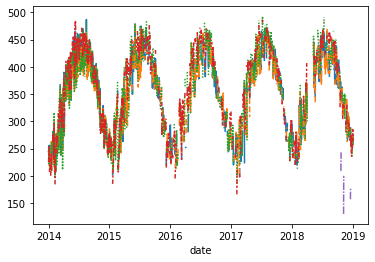

In [6]:
years = []
stationlist = ['AE000041196', 'AEM00041194', 'AEM00041217', 'AEM00041218', 'AFM00040938']
year = 0
ultimate = pd.DataFrame()
for f in glob.glob("/Users/athenaye/Desktop/by_year_parquet_trial/*.parquet"):    
    read = pd.read_parquet(f)
    f = pd.DataFrame()
    parameter = 'TMAX'
    if parameter in read.columns:
        years.append(f)
    else:
        print(str(parameter)+ ' was not found in ' + f)
        break
    read = read[parameter]
    #print(read)
    for s in range(len(stationlist)):
        stationtavg = read.xs((stationlist[s]), level = "station")
        #print(stationtavg)
        f['station '+str(stationlist[s])] = stationtavg
        #print(f)
    ultimate = pd.concat([ultimate, f])
    print("Done with 1 year")
    year += 1
maxoverall = ultimate.sort_values(by='date')
sns.lineplot(data = maxoverall, legend = False)

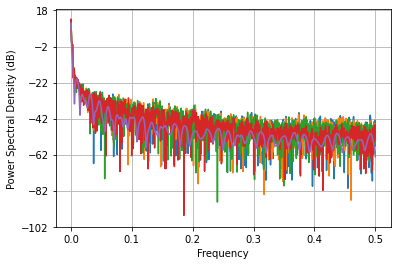

In [7]:
for x in range(len(maxoverall.columns)):
    nonan = maxoverall[maxoverall.columns[x]]
    nonan = nonan.interpolate('time', limit_direction='both')
    a,b = plt.psd(nonan, Fs = 1, scale_by_freq = False, NFFT = 2**14 )
    
    if x == 0:
        tmaxacumulative = a
        tmaxbcumulative = b
    else:
        tmaxacumulative = np.vstack([tmaxacumulative, a])
        tmaxbcumulative = np.vstack([tmaxbcumulative, b])
tmaxamean = np.nanmean(tmaxacumulative, axis=(0))
tmaxbmean = np.nanmean(tmaxbcumulative, axis=(0))

Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year


<AxesSubplot:xlabel='date'>

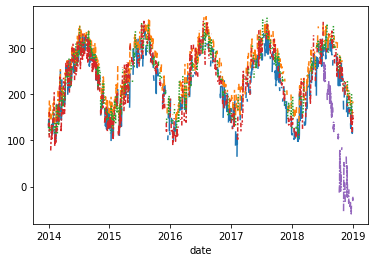

In [8]:
years = []
stationlist = ['AE000041196', 'AEM00041194', 'AEM00041217', 'AEM00041218', 'AFM00040938']
year = 0
ultimate = pd.DataFrame()
for f in glob.glob("/Users/athenaye/Desktop/by_year_parquet_trial/*.parquet"):    
    read = pd.read_parquet(f)
    #print(f)
    f = pd.DataFrame()
    parameter = 'TMIN'
    if parameter in read.columns:
        years.append(f)
    else:
        print(str(parameter)+ ' was not found in ' + f)
        break
    read = read[parameter]
    #print(read)
    for s in range(len(stationlist)):
        stationtavg = read.xs((stationlist[s]), level = "station")
        #print(stationtavg)
        f['station '+str(stationlist[s])] = stationtavg
        #print(f)
    ultimate = pd.concat([ultimate, f])
    print("Done with 1 year")
    year += 1
minoverall = ultimate.sort_values(by='date')
sns.lineplot(data = minoverall, legend = False)


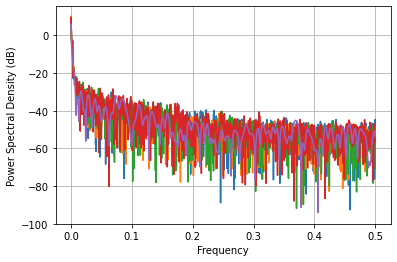

In [9]:
for x in range(len(minoverall.columns)):
    nonan = minoverall[minoverall.columns[x]]
    nonan = nonan.interpolate('time',limit_direction='both')
    a,b = plt.psd(nonan, Fs = 1, scale_by_freq = False, NFFT = 2**14 )
    
    if x == 0:
        tminacumulative = a
        tminbcumulative = b
    else:
        tminacumulative = np.vstack([tminacumulative, a])
        tminbcumulative = np.vstack([tminbcumulative, b])
tminamean = np.nanmean(tminacumulative, axis=(0))
tminbmean = np.nanmean(tminbcumulative, axis=(0))

Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year


<AxesSubplot:xlabel='date'>

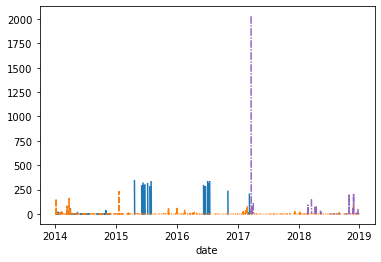

In [10]:
years = []
stationlist = ['AE000041196', 'AEM00041194', 'AEM00041217', 'AEM00041218', 'AFM00040938']
year = 0
ultimate = pd.DataFrame()
for f in glob.glob("/Users/athenaye/Desktop/by_year_parquet_trial/*.parquet"):    
    read = pd.read_parquet(f)
    #print(f)
    f = pd.DataFrame()
    parameter = 'PRCP'
    if parameter in read.columns:
        years.append(f)
    else:
        print(str(parameter)+ ' was not found in ' + f)
        break
    read = read[parameter]
    #print(read)
    for s in range(len(stationlist)):
        stationtavg = read.xs((stationlist[s]), level = "station")
        #print(stationtavg)
        f['station '+str(stationlist[s])] = stationtavg
        #print(f)
    ultimate = pd.concat([ultimate, f])
    print("Done with 1 year")
    year += 1
prcpoverall = ultimate.sort_values(by='date')
sns.lineplot(data = prcpoverall, legend = False)


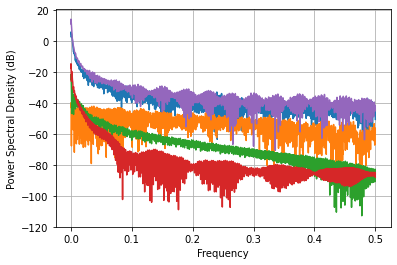

In [11]:
for x in range(len(prcpoverall.columns)):
    nonan = prcpoverall[prcpoverall.columns[x]]
    nonan = nonan.interpolate('time',limit_direction='both')
    a,b = plt.psd(nonan, Fs = 1, scale_by_freq = False, NFFT = 2**14 )
    
    if x == 0:
        prcpacumulative = a
        prcpbcumulative = b
    else:
        prcpacumulative = np.vstack([prcpacumulative, a])
        prcpbcumulative = np.vstack([prcpbcumulative, b])
prcpamean = np.nanmean(prcpacumulative, axis=(0))
prcpbmean = np.nanmean(prcpbcumulative, axis=(0))

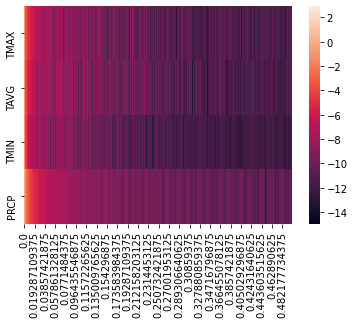

In [12]:
param1 = ['TAVG']
param2 = ['TMAX']
param3 = ['TMIN']
param4 = ['PRCP']
#take difference in between 0.5 and 0.48, then find lowest freq value 
hm1 = pd.DataFrame(data = amean, columns = param1, index = bmean)
hm2 = pd.DataFrame(data = tmaxamean, columns = param2, index = tmaxbmean)
hm3 = pd.DataFrame(data = tminamean, columns = param3, index = tminbmean)
hm4 = pd.DataFrame(data = prcpamean, columns = param4, index = prcpbmean)
hm = pd.concat([hm2, hm1, hm3, hm4], axis=1)
#print(hm)
loghm = np.log(hm)
fig = sns.heatmap(loghm.T)
#plt.xscale("log", base = 2)

In [13]:
heatmap = np.empty((5500,5))
for x in range(5500):
    heatmap[x,0]=0.0001*x

In [14]:
print(loghm.index)

Float64Index([             0.0,  6.103515625e-05,  0.0001220703125,
              0.00018310546875,   0.000244140625, 0.00030517578125,
               0.0003662109375, 0.00042724609375,    0.00048828125,
              0.00054931640625,
              ...
              0.49945068359375,    0.49951171875, 0.49957275390625,
               0.4996337890625, 0.49969482421875,   0.499755859375,
              0.49981689453125,  0.4998779296875, 0.49993896484375,
                           0.5],
             dtype='float64', length=8193)


In [15]:
j=0
for i in range(heatmap.shape[0]):
    #for j in range(hm.shape[0]-1):
    if (abs(heatmap[i,0] >= hm.index[j]) and abs(heatmap[i,0] < hm.index[j+1])):
        heatmap[i,1:] = hm.iloc[j]
        j+=1
    if j<1025:
        break

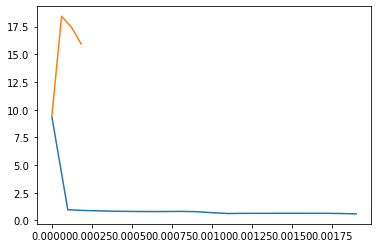

In [16]:
plt.plot(heatmap[:20,0], heatmap[:20,1])
plt.plot(hm.iloc[:4, 0])

In [17]:
tmax = sci.interpolate.interp1d(1/hm.index[1:],hm.iloc[1:,0], kind = 'nearest')

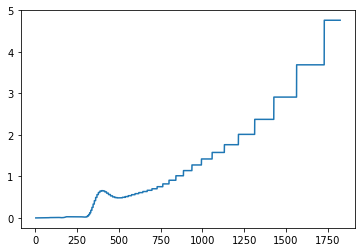

In [18]:
x1 = np.linspace(2,365*5, num = 8193, endpoint = True)
plt.plot(x1, tmax(x1))
hi = x1, tmax(x1)

In [19]:
param = ['TMAX', 'TAVG', 'TMIN', 'PRCP']
interpolated = pd.DataFrame()
for x in range(len(param)):
    base = sci.interpolate.interp1d(1/hm.index[1:],hm.iloc[1:,x], kind = 'nearest')
    xvalues = np.linspace(2,365*5, num = 8193, endpoint = True)
    interparray = base(xvalues)
    series = pd.Series(interparray)
    interpolated = pd.concat([interpolated, series], axis = 1)
interpolated.columns = param
interpolated.index = loghm.index

In [20]:
print(interpolated)

              TMAX      TAVG      TMIN      PRCP
0.000000  0.000005  0.000007  0.000005  0.000009
0.000061  0.000014  0.000011  0.000004  0.000012
0.000122  0.000012  0.000020  0.000005  0.000016
0.000183  0.000034  0.000027  0.000008  0.000017
0.000244  0.000008  0.000013  0.000008  0.000021
...            ...       ...       ...       ...
0.499756  4.763858  3.082828  2.052493  3.975249
0.499817  4.763858  3.082828  2.052493  3.975249
0.499878  4.763858  3.082828  2.052493  3.975249
0.499939  4.763858  3.082828  2.052493  3.975249
0.500000  4.763858  3.082828  2.052493  3.975249

[8193 rows x 4 columns]


<AxesSubplot:>

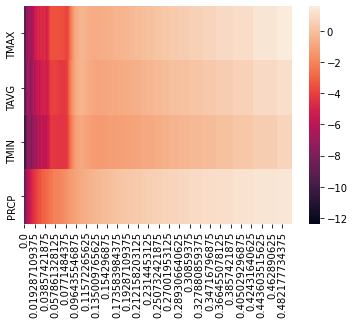

In [21]:
sns.heatmap(np.log(interpolated.T))

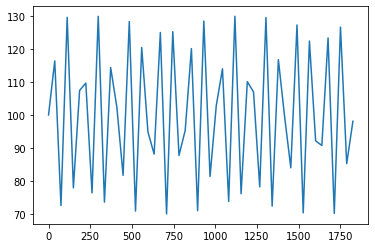

In [22]:
x = np.linspace(0,5*365)
y = np.sin(x/365*6.28*4)*30+100
#y += np.sin(x/20*6)*50
plt.plot(x,y)
#plt.psd(y, Fs = 1, scale_by_freq = False, NFFT = 2**14)

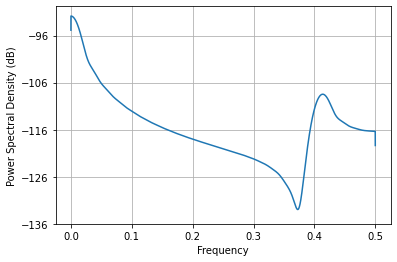

In [23]:
a,b = plt.psd(y, Fs = 1, scale_by_freq = False, NFFT = 2**14)

<AxesSubplot:>

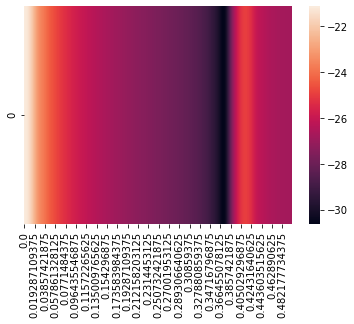

In [24]:
hi = pd.DataFrame(data = a, index = b)
sns.heatmap(np.log(hi.T))

## From 6/15

In [153]:
pip install pycwt

     |████████████████████████████████| 758 kB 2.9 MB/s eta 0:00:01
  Created wheel for pycwt: filename=pycwt-0.3.0a22-py3-none-any.whl size=17806 sha256=27dc20c9c92ed04a44af69ee19d71a6c9bf4d7101a5a0877627f1ece0c7a9043
  Stored in directory: /Users/athenaye/Library/Caches/pip/wheels/79/a5/b0/4de0c4f348ee322a4cef90e046f0ce6cf21e028da682551e34
Successfully built pycwt
Note: you may need to restart the kernel to use updated packages.


In [12]:
from __future__ import division
import numpy
from matplotlib import pyplot

import pycwt as wavelet
from pycwt.helpers import find

In [30]:
url = 'http://paos.colorado.edu/research/wavelets/wave_idl/nino3sst.txt'
#dat = numpy.genfromtxt(url, skip_header=19)
dat = stationtavg
title = 'NINO3 Sea Surface Temperature'
label = 'NINO3 SST'
units = 'degC'
t0 = 1998
dt = 1/365  # In years

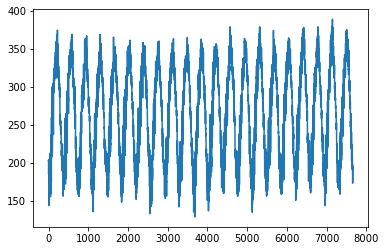

In [31]:
plt.plot(dat)

In [32]:
N = dat.size
t = numpy.arange(0, N) * dt + t0

In [33]:
p = numpy.polyfit(t - t0, dat, 1)
dat_notrend = dat - numpy.polyval(p, t - t0)
std = dat_notrend.std()  # Standard deviation
var = std ** 2  # Variance
dat_norm = dat_notrend / std  # Normalized dataset

In [34]:
mother = wavelet.Morlet(6)
s0 = 2 * dt  # Starting scale, in this case 2 * 0.25 years = 6 months
dj = 1 / 12  # Twelve sub-octaves per octaves
J = 7 / dj  # Seven powers of two with dj sub-octaves
alpha, _, _ = wavelet.ar1(dat)  # Lag-1 autocorrelation for red noise

In [35]:
wave, scales, freqs, coi, fft, fftfreqs = wavelet.cwt(dat_norm, dt, dj, s0, J,
                                                      mother)
iwave = wavelet.icwt(wave, scales, dt, dj, mother) * std

In [36]:
power = (numpy.abs(wave)) ** 2
fft_power = numpy.abs(fft) ** 2
period = 1 / freqs

In [66]:
period

array([0.00566051, 0.0059971 , 0.00635371, 0.00673152, 0.0071318 ,
       0.00755588, 0.00800517, 0.00848119, 0.0089855 , 0.00951981,
       0.01008589, 0.01068563, 0.01132103, 0.01199421, 0.01270742,
       0.01346304, 0.0142636 , 0.01511176, 0.01601035, 0.01696237,
       0.01797101, 0.01903962, 0.02017178, 0.02137125, 0.02264205,
       0.02398842, 0.02541484, 0.02692609, 0.0285272 , 0.03022351,
       0.0320207 , 0.03392475, 0.03594202, 0.03807924, 0.04034355,
       0.0427425 , 0.04528411, 0.04797684, 0.05082969, 0.05385218,
       0.0570544 , 0.06044703, 0.0640414 , 0.0678495 , 0.07188404,
       0.07615848, 0.0806871 , 0.08548501, 0.09056821, 0.09595368,
       0.10165938, 0.10770436, 0.11410879, 0.12089406, 0.12808279,
       0.13569899, 0.14376807, 0.15231697, 0.1613742 , 0.17097001,
       0.18113642, 0.19190735, 0.20331876, 0.21540872, 0.22821759,
       0.24178811, 0.25616558, 0.27139798, 0.28753614, 0.30463393,
       0.32274841, 0.34194003, 0.36227284, 0.3838147 , 0.40663

In [37]:
power /= scales[:, None]

In [38]:
signif, fft_theor = wavelet.significance(1.0, dt, scales, 0, alpha,
                                         significance_level=0.95,
                                         wavelet=mother)
sig95 = numpy.ones([1, N]) * signif[:, None]
sig95 = power / sig95

In [39]:
glbl_power = power.mean(axis=1)
dof = N - scales  # Correction for padding at edges
glbl_signif, tmp = wavelet.significance(var, dt, scales, 1, alpha,
                                        significance_level=0.95, dof=dof,
                                        wavelet=mother)

In [43]:
sel = find((period >= 0.02) & (period < 0.09))
Cdelta = mother.cdelta
scale_avg = (scales * numpy.ones((N, 1))).transpose()
scale_avg = power / scale_avg  # As in Torrence and Compo (1998) equation 24
scale_avg = var * dj * dt / Cdelta * scale_avg[sel, :].sum(axis=0)
scale_avg_signif, tmp = wavelet.significance(var, dt, scales, 2, alpha,
                                             significance_level=0.95,
                                             dof=[scales[sel[0]],
                                                  scales[sel[-1]]],
                                             wavelet=mother)

/Users/athenaye/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


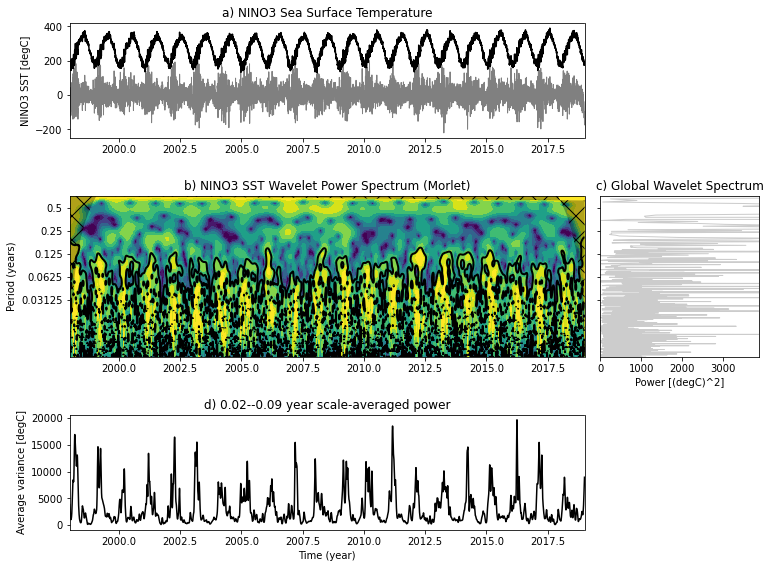

In [68]:
# Prepare the figure
pyplot.close('all')
pyplot.ioff()
figprops = dict(figsize=(11, 8), dpi=72)
fig = pyplot.figure(**figprops)

# First sub-plot, the original time series anomaly and inverse wavelet
# transform.
ax = pyplot.axes([0.1, 0.75, 0.65, 0.2])
ax.plot(t, iwave, '-', linewidth=1, color=[0.5, 0.5, 0.5])
ax.plot(t, dat, 'k', linewidth=1.5)
ax.set_title('a) {}'.format(title))
ax.set_ylabel(r'{} [{}]'.format(label, units))

# Second sub-plot, the normalized wavelet power spectrum and significance
# level contour lines and cone of influece hatched area. Note that period
# scale is logarithmic.
bx = pyplot.axes([0.1, 0.37, 0.65, 0.28], sharex=ax)
levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16]
bx.contourf(t, numpy.log2(period), numpy.log2(power), numpy.log2(levels),
            extend='both', cmap=pyplot.cm.viridis)
extent = [t.min(), t.max(), 0, max(period)]
bx.contour(t, numpy.log2(period), sig95, [-99, 1], colors='k', linewidths=2,
           extent=extent)
bx.fill(numpy.concatenate([t, t[-1:] + dt, t[-1:] + dt,
                           t[:1] - dt, t[:1] - dt]),
        numpy.concatenate([numpy.log2(coi), [1e-9], numpy.log2(period[-1:]),
                           numpy.log2(period[-1:]), [1e-9]]),
        'k', alpha=0.3, hatch='x')
bx.set_title('b) {} Wavelet Power Spectrum ({})'.format(label, mother.name))
bx.set_ylabel('Period (years)')
#
Yticks = 2 ** numpy.arange(numpy.ceil(numpy.log2(period.min())),
                           numpy.ceil(numpy.log2(period.max())))
bx.set_yticks(numpy.log2(Yticks))
bx.set_yticklabels(Yticks)

# Third sub-plot, the global wavelet and Fourier power spectra and theoretical
# noise spectra. Note that period scale is logarithmic.
cx = pyplot.axes([0.77, 0.37, 0.2, 0.28], sharey=bx)
#cx.plot(glbl_signif, numpy.log2(period), 'k--')
#cx.plot(var * fft_theor, numpy.log2(period), '--', color='#cccccc')
cx.plot(var * fft_power, numpy.log2(1./fftfreqs), '-', color='#cccccc',
        linewidth=1.)
#cx.plot(var * glbl_power, numpy.log2(period), 'k-', linewidth=1.5)
cx.set_title('c) Global Wavelet Spectrum')
cx.set_xlabel(r'Power [({})^2]'.format(units))
cx.set_xlim([0, glbl_power.max() + var])
cx.set_ylim(numpy.log2([period.min(), period.max()]))
cx.set_yticks(numpy.log2(Yticks))
cx.set_yticklabels(Yticks)
pyplot.setp(cx.get_yticklabels(), visible=False)

# Fourth sub-plot, the scale averaged wavelet spectrum.
dx = pyplot.axes([0.1, 0.07, 0.65, 0.2], sharex=ax)
#dx.axhline(scale_avg_signif, color='k', linestyle='--', linewidth=1.)
dx.plot(t, scale_avg, 'k-', linewidth=1.5)
dx.set_title('d) {}--{} year scale-averaged power'.format(.02, .09))
dx.set_xlabel('Time (year)')
dx.set_ylabel(r'Average variance [{}]'.format(units))
ax.set_xlim([t.min(), t.max()])

pyplot.show()

## Previous

In [ ]:
import seaborn as sns
sns.lineplot(data = wideform.iloc[: , 1:100]/10, legend=False)
plt.title("Average Temperature")
#sns.lineplot(wideform['Day Number'], wideform[:, 1:10])

In [ ]:
fftdata = np.fft.fft(wideform.iloc[: , :], axis=0)
plt.plot(np.nanmean(fftdata.real, axis=1)[1:100])
plt.plot((fftdata.real[1:]))
plt.title("Average Temperature")

#plt.plot(np.mean(wideform.iloc[: , 1:5], axis=1))

In [ ]:
twenty_nineteen_sample['date'] = pd.to_datetime(twenty_nineteen_sample['date'], format='%Y%m%d')
tmin = twenty_nineteen_sample[twenty_nineteen_sample['data']=='TMIN']
tminwideform = tmin.pivot(index = "date", columns = "station", values = "value")

In [ ]:
import seaborn as sns
sns.lineplot(data = tminwideform.iloc[: , 1:5]/10)
plt.title("Minumum Temperature")

In [ ]:
tminfftdata = np.fft.fft(tminwideform.iloc[: , :], axis=0)
plt.plot(np.nanmean(tminfftdata.real, axis=1)[1:])
plt.title("Minumum Temperature")

In [ ]:
twenty_nineteen_sample['date'] = pd.to_datetime(twenty_nineteen_sample['date'], format='%Y%m%d')
tmax = twenty_nineteen_sample[twenty_nineteen_sample['data']=='TMAX']
tmaxwideform = tmax.pivot(index = "date", columns = "station", values = "value")

In [ ]:
import seaborn as sns
sns.lineplot(data = tmaxwideform.iloc[: , 1:5]/10)
plt.title("Maximum Temperature")

In [ ]:
tmaxfftdata = np.fft.fft(tminwideform.iloc[: , :], axis=0)
#plt.plot(np.nanmean(tminfftdata.real, axis=1)[1:])
plt.plot(np.nanmean(tmaxfftdata.real, axis=1)[1:])
plt.plot((tmaxfftdata.real[1:]))
plt.title("Maximum Temperature")
#plt.plot(np.nanmean(fftdata.real, axis=1)[1:])

# DAILY SUMMARIES

## Precipitation

In [25]:
#Pivot for Precipitation
prcpunpivoted = twenty_nineteen_sample[twenty_nineteen_sample['data']=="PRCP"]
prcp=prcpunpivoted.pivot(index='date', columns="station", values = "value")
prcp

NameError: name 'twenty_nineteen_sample' is not defined

In [ ]:
#Precipitation Plot
import seaborn as sns
sns.lineplot(data = prcp.iloc[: , 1:100], legend=False)
plt.title("Precipitation Plot")

In [ ]:
#Precipitation Fourier
prcpftt = np.fft.fft(prcp.iloc[: , 1:100], axis=0)
plt.plot((prcpftt.real)[1:])
plt.title("Precipitation Fourier Transform")

#plt.plot(np.mean(wideform.iloc[: , 1:5], axis=1))

## Snow

In [ ]:
#Snow Plot
snowunpivoted=twenty_nineteen_sample[twenty_nineteen_sample['data']=="SNOW"]
snow=snowunpivoted.pivot(index='date', columns="station", values = "value")
sns.lineplot(data = snow.iloc[: , 1:100], legend = False)
plt.title("Snow Plot")

In [ ]:
#Snow Fourier
snowlcd = np.fft.fft(lcd.iloc[: , 6], axis=0)
snoweastcoast = np.fft.fft(eastcoastsnow.iloc[: , :], axis=0)
plt.plot((snowlcd.real)[1:])
plt.plot((snoweastcoast.real)[1:])
plt.title("Snow Fourier Transform")

## Average Temp

In [ ]:
tavgunpivoted=twenty_nineteen_sample[twenty_nineteen_sample['data']=="TAVG"]
tavg=tavgunpivoted.pivot(index='date', columns="station", values = "value")
sns.lineplot(data = tavg.iloc[: , 1:100]/10, legend = False)
#sns.lineplot(data = eastcoasttavg.iloc[: , :], legend = False)
plt.title("Average Temp Plot")
#average of all average temperatures each year
# then do for every year
#take average of each site for all time points (last 10 years)

In [ ]:
tavgfourier = np.fft.fft(tavg.iloc[: , 1:100], axis=0)
plt.plot(abs((tavgfourier.real)[1:]))
plt.title("Average Temp Transform")
# make on 10 year long dataa set and take the fourier transform of that, for each station, and then average for all of the stations
# label the fourier
# take absolute value
# fourier power spectrum


## Fastest 2-minute Wind Speed 

In [ ]:
#Avg Wind Speed Plot
eastcoastwsf2=eastcoast2019.pivot(index='DATE', columns="STATION", values = "WSF2")
sns.lineplot(data = lcd.iloc[: , 13])
sns.lineplot(data = eastcoastwsf2.iloc[: , :], legend = False)
plt.title("Fastest 2-minute Wind Speed Plot")

In [ ]:
#Avg Wind Speed Fourier
wsf2lcd = np.fft.fft(lcd.iloc[: , 13], axis=0)
wsf2eastcoast = np.fft.fft(eastcoastwsf2.iloc[: , :], axis=0)
plt.plot((wsf2lcd.real)[1:])
plt.plot((wsf2eastcoast.real)[1:])
plt.title("Fastest 2-minute Wind Speed  Fourier Transform")

## Average Wind Speed

In [ ]:
#Avg Wind Speed Plot
eastcoastawnd=eastcoast2019.pivot(index='DATE', columns="STATION", values = "AWND")
sns.lineplot(data = lcd.iloc[: , 4])
sns.lineplot(data = eastcoastawnd.iloc[: , :], legend = False)
plt.title("Average Wind Speed Plot")

In [ ]:
#Snow Fourier
awndlcd = np.fft.fft(lcd.iloc[: , 4], axis=0)
awndeastcoast = np.fft.fft(eastcoastsnow.iloc[: , :], axis=0)
plt.plot((awndlcd.real)[1:])
plt.plot((awndeastcoast.real)[1:])
plt.title("Snow Fourier Transform")

# Extra

In [ ]:
import seaborn as sns
sns.lineplot(data = lcd.iloc[: , 7])
plt.title("Average Temp Plot")

In [ ]:
prcpftt = np.fft.fft(lcd.iloc[: , 7], axis=0)
plt.plot((prcpftt.real)[1:])
plt.title("Average Temp Fourier")

In [135]:
years = []
stationlist = ['AE000041196', 'AEM00041194', 'AEM00041217', 'AEM00041218', 'AFM00040938']
year = 0
ultimate = pd.DataFrame()
param = ['TMAX', 'TAVG', 'TMIN', 'PRCP']
hi = np.empty()
for p in param:
    for f in glob.glob("/Users/athenaye/Desktop/by_year_parquet_trial/*.parquet"):    
        read = pd.read_parquet(f)
        f = pd.DataFrame()
        if p in read.columns:
            years.append(f)
        else:
            print(str(p)+ ' was not found in ' + f)
            break
        reads = read[p]
        for s in range(len(stationlist)):
            stationtavg = reads.xs((stationlist[s]), level = "station")
            #print(stationtavg)
            f['station '+str(stationlist[s])] = stationtavg
        ultimate = pd.concat([ultimate, f])
        print("Done with 1 year")
        year += 1
    avgoverall = ultimate.sort_values(by='date')
    #hi=pd.concat([hi, avgoverall], axis = 2)

Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year
Done with 1 year


ValueError: No axis named 2 for object type DataFrame

In [136]:
avgoverall

,station AE000041196,station AEM00041194,station AEM00041217,station AEM00041218,station AFM00040938
date,,,,,
2014-01-01,244.0,241.0,244.0,226.0,NaN
2014-01-02,243.0,241.0,253.0,233.0,NaN
2014-01-03,233.0,232.0,228.0,239.0,NaN
2014-01-04,230.0,231.0,220.0,226.0,NaN
2014-01-05,256.0,248.0,251.0,255.0,NaN
...,...,...,...,...,...
2018-12-27,263.0,268.0,265.0,259.0,NaN
2018-12-28,258.0,261.0,271.0,251.0,NaN
2018-12-29,266.0,273.0,272.0,262.0,NaN
